# Compare clusters

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import qgrid

#from nma_class import loader
from nma_class_Copy1 import loader
from nma_class_Copy1 import eda


%matplotlib inline

### To compare the trials
Output: 

Table with

session name;	all trials;	correct trials;	diff contrast;	no contrast;	%Correct;	%Contrast;	% 0contrast

In [13]:
# for the first session: 

# link to parent folder with all datasets
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

from nma_class_Copy1 import loader
#to load older sessions 
loader = loader(main_folder)
all_session_folders, all_session_names = loader.get_available_session()
# load default session 
# put here any integer instead of 0 or directly the folder of the session

session_folder = all_session_folders[0]
session_name =  all_session_names[0]
session = loader.load_session(session_folder, fast=True)

spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']







#separate data for the correct trials
trials_select_df = trials_df.loc[trials_df['included']==True]

correct_df = trials_select_df.loc[(trials_select_df['feedback type']==1)]
diff_contrasts_df = correct_df.loc[(correct_df['stim contrast left']!=(correct_df['stim contrast right']))]
no_contrasts_df = correct_df.loc[(correct_df['stim contrast left']==0) & (correct_df['stim contrast right']==0)]


all_t = len(trials_select_df)
crrct = len(correct_df)
cont = len(diff_contrasts_df)
nocont = len(no_contrasts_df)

df1 = ''
df1 = {'session name': [session_name],
      'all trials': [all_t], 
      'correct trials': [crrct], 
      'diff contrast t': [cont], 
      'no contras': [nocont], 
      '%Correct': [round(crrct/all_t*100,2)], 
       '%Contrast':[round(cont/crrct*100,2)], 
       '%0contrast':[round(nocont/crrct*100,2)]}

df2 = pd.DataFrame(data=df1)


df3 = df2

In [14]:
df3

,session name,all trials,correct trials,diff contrast t,no contras,%Correct,%Contrast,%0contrast
0,Cori_2016-12-14,201,141,57,84,70.15,40.43,59.57


In [15]:
# adjust the df index 

df3.set_index("session name", inplace = True) 

#add new column to existing df
# creating a new column session_number 
df3['session_number'] = ''
df3['session_number'][0] = 0
for i in range(1,len(df3)): 
    df3['session_number'][i] = (df3['session_number'][i-1]) +1
df3

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,all trials,correct trials,diff contrast t,no contras,%Correct,%Contrast,%0contrast,session_number
session name,,,,,,,,
Cori_2016-12-14,201,141,57,84,70.15,40.43,59.57,0


In [16]:
#to save
#df3.to_csv (r'/Users/kcenia/Documents/GitHub/NMA_project/kce/clusters_comparison_df.csv', index = False, header=True)


## To plot the trials

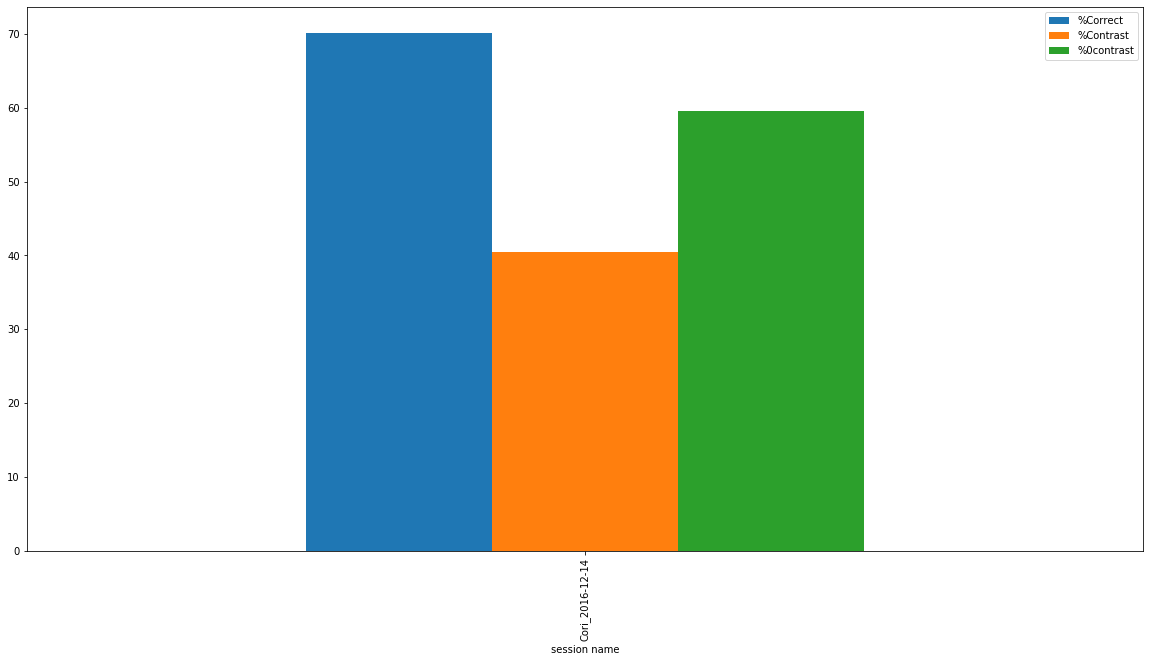

In [17]:
df4 = df3['%Correct']
#df4 = pd.concat([df4, df3['all trials']], axis=1, sort=False)
df4 = pd.concat([df4, df3['%Contrast']], axis=1, sort=False)
df4 = pd.concat([df4, df3['%0contrast']], axis=1, sort=False)  

figure = df4.plot.bar(figsize=(20,10));

In [18]:
#save the figure
#figure.figure.savefig('trials_comparison.png')

In [19]:
spikes_df

,cluster,spike_times
0,527,0.003367
1,487,0.004733
2,243,0.006767
3,510,0.006933
4,435,0.007433
...,...,...
10017471,652,2702.642495
10017472,821,2702.643028
10017473,1008,2702.643028
10017474,813,2702.643128


In [20]:
clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True)
clusters_df

,label,spikes,total spikes,recording area
cluster,,,,
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS
5,mua,"[0.0155, 0.8953666666666666, 1.3817, 1.8120333...",2733,ACA
8,mua,"[0.17423333333333332, 0.19976666666666668, 0.2...",5905,LS
12,mua,"[2.3132, 3.0502333333333334, 3.6675, 4.928, 5....",6704,ACA
18,mua,"[3.3243666666666667, 7.3177666666666665, 8.189...",5589,MOs
...,...,...,...,...
994,mua,"[2.7875193566472314, 2.809886123350189, 3.0496...",10533,DG
996,mua,"[2.543018263105959, 5.156129950356261, 5.19923...",1639,root
998,mua,"[2.4551178699678085, 3.6627566045154234, 5.027...",1523,SUB


In [21]:
data = [spikes_df, clusters_df, trials_df]
params = dict()
params['sampling_rate'] = 20000

session_eda = eda(data, all_session_names[0], all_session_folders[0], params)

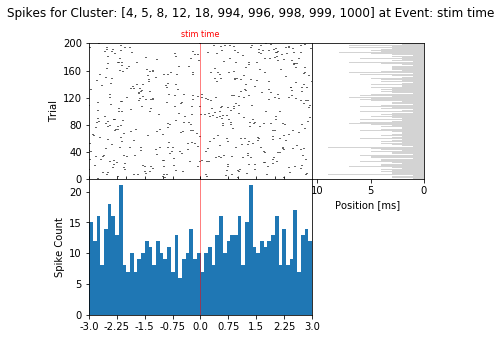

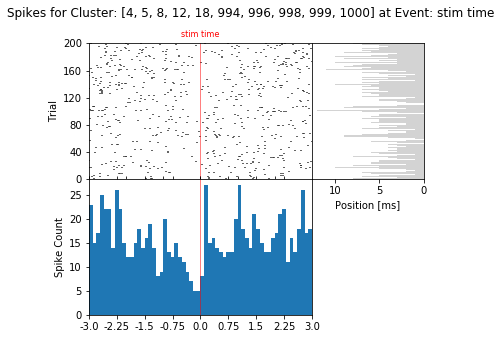

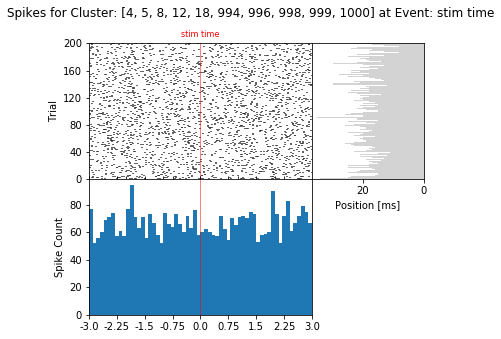

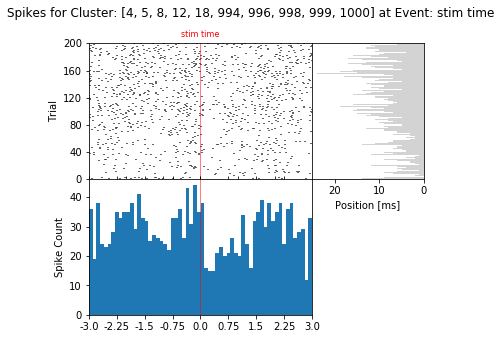

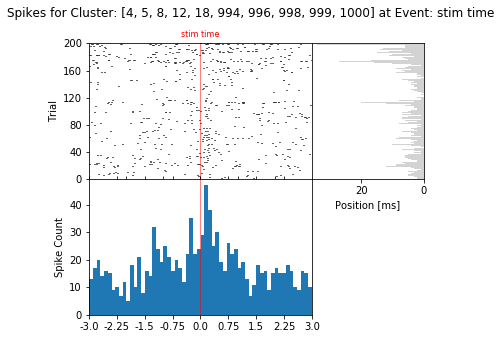

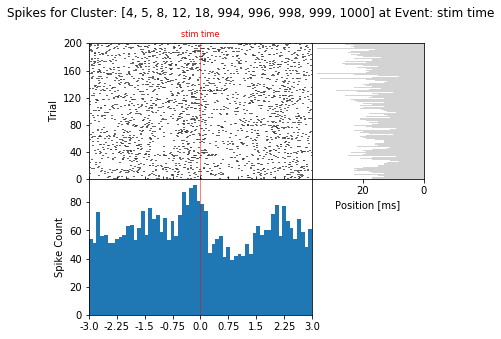

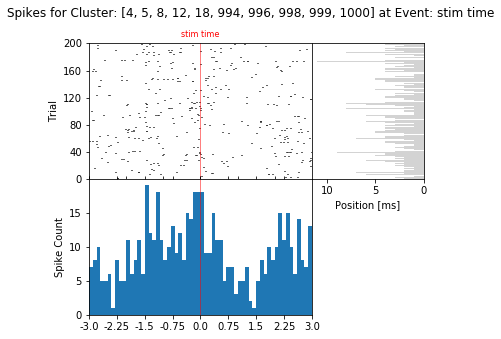

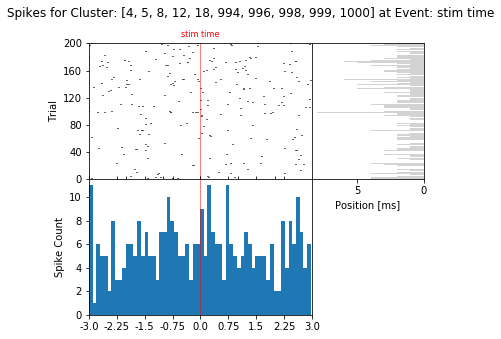

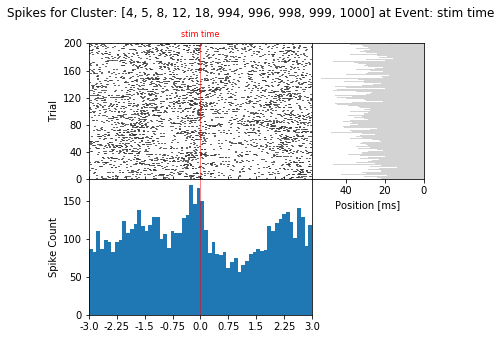

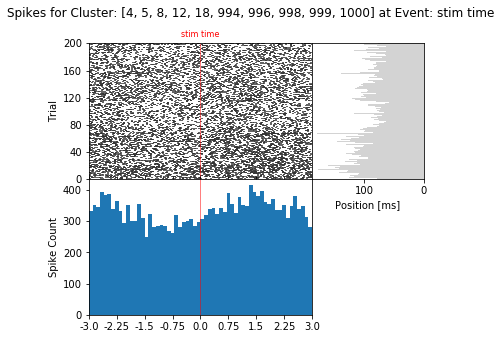

In [22]:
# 2) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 

title = None
cluster = [4,5,8,12,18,994,996,998,999,1000]
event = 'stim time' #select the event to be time = 0 and plot the spikes around it
window = 3 #from -1 to 1 seconds if window = 1

for i in range(len(cluster)): 
    trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True, 'stim time']
    spikes = clusters_df.loc[cluster[i], 'spikes']
    fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df, spikes)
plt.show()

In [82]:
clusters_index = clusters_df.index
clusters_index

Int64Index([   4,    5,    8,   12,   18,   19,   21,   24,   29,   31,
            ...
             983,  985,  986,  989,  990,  994,  996,  998,  999, 1000],
           dtype='int64', name='cluster', length=356)

In [94]:
clusters_df['min'] = ''
for i in clusters_index: 
    clusters_df['min'][i] = min(clusters_df['spikes'][i])
    
clusters_df['max'] = ''
for i in clusters_index: 
    clusters_df['max'][i] = max(clusters_df['spikes'][i])

clusters_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,label,spikes,total spikes,recording area,min,max
cluster,,,,,,
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS,0.838367,2699.92
5,mua,"[0.0155, 0.8953666666666666, 1.3817, 1.8120333...",2733,ACA,0.0155,2699.71
8,mua,"[0.17423333333333332, 0.19976666666666668, 0.2...",5905,LS,0.174233,2699.12
12,mua,"[2.3132, 3.0502333333333334, 3.6675, 4.928, 5....",6704,ACA,2.3132,2699.99
18,mua,"[3.3243666666666667, 7.3177666666666665, 8.189...",5589,MOs,3.32437,2697.38
...,...,...,...,...,...,...
994,mua,"[2.7875193566472314, 2.809886123350189, 3.0496...",10533,DG,2.78752,2702.55
996,mua,"[2.543018263105959, 5.156129950356261, 5.19923...",1639,root,2.54302,2701.39
998,mua,"[2.4551178699678085, 3.6627566045154234, 5.027...",1523,SUB,2.45512,2702.6


In [105]:
import pandas as pd
import numpy as np

# Specifiy your desired dz step size
step = 10
dz = np.arange(0,1000,step)

# rebin dataframe
clusters2_df = clusters_df.groupby(pd.cut(clusters_df.spikes, dz[i], labels=False), as_index=False).mean()

# refill 'depth' column
clusters2_df.depth = dz[:-1]

ValueError: operands could not be broadcast together with shapes (5124,) (2733,) 

In [69]:
step = 0.5
dz = np.arange(1,3,step)
dz

array([1. , 1.5, 2. , 2.5])

In [15]:
'''
clusters_goodmua_index = clusters_df.index.tolist()
clusters_goodmua_index_filt = clusters_goodmua_index[0:20]
clusters_goodmua_index_filt
'''

# doesnt work 

'''
spikes_filtered_df = spikes_df
# filter the good and mua spikes by the clusters they belong to 
for j in range(len(clusters_goodmua_index_filt)): 
    for i in range(len(spikes_filtered_df)): 
        if (spikes_filtered_df['cluster'][i]==clusters_goodmua_index_filt[j]): 
            spikes_filtered_df[i] = spikes_filtered_df[i]
        else: 
            spikes_filtered_df[i] = 0
'''

"\nspikes_filtered_df = spikes_df\n# filter the good and mua spikes by the clusters they belong to \nfor j in range(len(clusters_goodmua_index_filt)): \n    for i in range(len(spikes_filtered_df)): \n        if (spikes_filtered_df['cluster'][i]==clusters_goodmua_index_filt[j]): \n            spikes_filtered_df[i] = spikes_filtered_df[i]\n        else: \n            spikes_filtered_df[i] = 0\n"

In [353]:
y = clusters_df['spikes'][593][:20]
y = pd.Series(y)
y

0     2.510085
1     2.531718
2     2.565018
3     2.593818
4     2.624152
5     2.635585
6     2.771053
7     2.836086
8     2.898753
9     2.901353
10    2.930887
11    3.040854
12    3.045354
13    3.083621
14    3.161988
15    3.181754
16    3.205721
17    3.222621
18    3.262288
19    3.328055
dtype: float64

In [354]:
trials_df

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,4,102.902255,105.566451,107.663576,107.704085,108.663712,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,1,1011.984838,1012.416509,1013.935392,1013.972534,1014.940135,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
193,True,1,1025.649259,1026.265530,1028.867955,1028.903172,1029.872834,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
197,True,2,1045.813506,1046.180248,1047.367781,1047.404267,1048.371960,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
199,True,1,1055.999115,1056.563213,1059.211103,1059.248856,1060.216446,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [355]:
trials2_df = trials_df
#trials2_df.drop(trials_df[trials_df['feedback type']==-1].index, axis=0, inplace=True)
trials2_df = trials2_df[:20]

In [356]:
trials2_df['start time']

0      62.900284
1      68.420838
2      74.602902
3      79.003653
8     102.902255
9     109.661966
10    114.318209
11    118.833840
12    128.402568
13    132.848384
14    136.617385
15    140.116488
16    145.730701
20    174.913822
23    192.030325
24    197.111719
26    206.578210
27    211.210056
28    214.861713
29    218.712357
Name: start time, dtype: float64

In [357]:
def make_design_matrix(stim, d=20):
  """Create time-lag design matrix from stimulus intensity vector.

  Args:
    stim (1D array): Stimulus intensity at each time point.
    d (number): Number of time lags to use.

  Returns
    X (2D array): GLM design matrix with shape T, d

  """

  # Create version of stimulus vector with zeros before onset
  padded_stim = np.concatenate([np.zeros(d - 1), stim])

  #####################################################################
  # Fill in missing code (...), 
  # then remove or comment the line below to test your function
  #raise NotImplementedError("Complete the make_design_matrix function")
  #####################################################################


  # Construct a matrix where each row has the d frames of
  # the stimulus proceeding and including timepoint t
  T = len(stim)  # Total number of timepoints (hint: total number of stimulus frames)
  X = np.zeros((T, d))
  for t in range(T):
      X[t] = padded_stim[t : t+d]

  return X

In [358]:
# Build the full design matrix
constant = np.ones_like(y)
X = np.column_stack([constant, make_design_matrix(trials2_df['start time'])])

# Get the MLE weights for the LG model
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta_lg = theta[1:]

In [359]:
def plot_spike_filter(theta, dt, **kws):
  """Plot estimated weights based on time lag model.

  Args:
    theta (1D array): Filter weights, not including DC term.
    dt (number): Duration of each time bin.
    kws: Pass additional keyword arguments to plot()

  """
  d = len(theta)
  t = np.arange(-d + 1, 1) * dt

  ax = plt.gca()
  ax.plot(t, theta, marker="o", **kws)
  ax.axhline(0, color=".2", linestyle="--", zorder=1)
  ax.set(
    xlabel="Time before spike (s)",
    ylabel="Filter weight",
  )

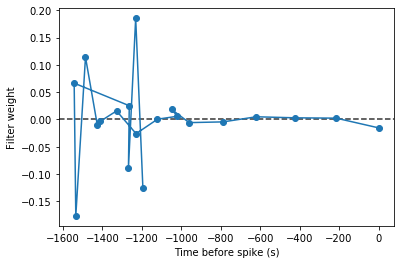

In [360]:
dt_stim = trials2_df['start time']
plot_spike_filter(theta_lg, dt_stim)

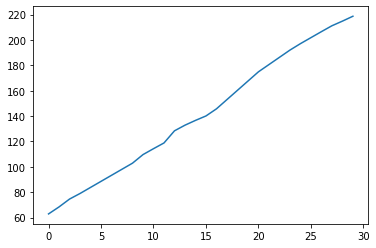

In [361]:
plt.plot(trials2_df['start time'])

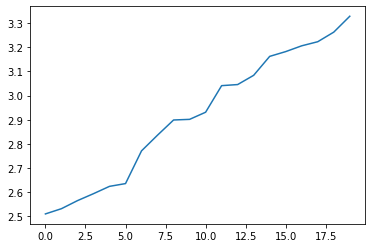

In [362]:
plt.plot(y)

In [363]:
def plot_spikes_with_prediction(
    spikes, predicted_spikes, dt, nt=20, t0=120, **kws):
  """Plot actual and predicted spike counts.

  Args:
    spikes (1D array): Vector of actual spike counts
    predicted_spikes (1D array): Vector of predicted spike counts
    dt (number): Duration of each time bin.
    nt (number): Number of time bins to plot
    t0 (number): Index of first time bin to plot.
    kws: Pass additional keyword arguments to plot()

  """
  t = np.arange(t0, t0 + nt) * dt

  f, ax = plt.subplots()
  lines = ax.stem(t, spikes[:nt], use_line_collection=True)
  plt.setp(lines, color=".5")
  lines[-1].set_zorder(1)
  kws.setdefault("linewidth", 3)
  yhat, = ax.plot(t, predicted_spikes[:nt], **kws)
  ax.set(
      xlabel="Time (s)",
      ylabel="Spikes",
  )
  ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
  ax.legend([lines[0], yhat], ["Spikes", "Predicted"])

  plt.show()

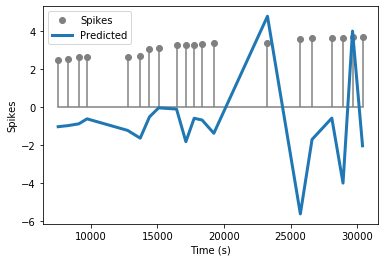

In [364]:
def predict_spike_counts_lg(stim, spikes, d=20):
  """Compute a vector of predicted spike counts given the stimulus.

  Args:
    stim (1D array): Stimulus values at each timepoint
    spikes (1D array): Spike counts measured at each timepoint
    d (number): Number of time lags to use.

  Returns:
    yhat (1D array): Predicted spikes at each timepoint.

  """
  ##########################################################################
  # Fill in missing code (...) and then comment or remove the error to test
  #raise NotImplementedError("Complete the predict_spike_counts_lg function")
  ##########################################################################

  # Create the design matrix
  stim = y
  constant = np.ones_like(y)
  X = np.column_stack([constant, make_design_matrix(trials2_df['start time'])])

  # Get the MLE weights for the LG model
  theta = np.linalg.inv(X.T @ X) @ X.T @ y ##function is matrix inverse

  # Compute predicted spike counts
  yhat = X @ theta
  return yhat



# Uncomment and run to test your function and plot prediction
predicted_counts = predict_spike_counts_lg(y, spikes)
plot_spikes_with_prediction(spikes, predicted_counts, dt_stim)